# Identifying Bias in Word Embeddings and Debiasing them

## Loading libraries and word embeddings

In [5]:
import gensim
import numpy as npy

model1 = gensim.models.KeyedVectors.load_word2vec_format('./reddit_US_w2v_2.w2v', binary=False, unicode_errors='ignore')
model2 = gensim.models.KeyedVectors.load_word2vec_format('./reddit_US_w2v_3.w2v', binary=False, unicode_errors='ignore')



## Checking for Bias in models

In [31]:
print("Model 1: Distance been man and programmer")
print(model1.distance('programmer','man'))
print("Model 1: Distance been womman and programmer")
print(model1.distance('programmer','woman'))
print("Model 2: Distance been man and programmer")
print(model2.distance('programmer','man'))
print("Model 2: Distance been womman and programmer")
print(model1.distance('programmer','woman'))

Model 1: Distance been man and programmer
0.6887528002262115
Model 1: Distance been womman and programmer
0.672260046005249
Model 2: Distance been man and programmer
0.668290764093399
Model 2: Distance been womman and programmer
0.672260046005249


In [172]:
print("Model 1: Distance been man and homemaker")
print(model1.distance('homemaker','man'))
print("Model 1: Distance been woman and homemaker")
print(model1.distance('homemaker','woman'))
print("Model 2: Distance been man and homemaker")
print(model2.distance('homemaker','man'))
print("Model 2: Distance been woman and homemaker")
print(model1.distance('homemaker','woman'))

Model 1: Distance been man and homemaker
0.7382047772407532
Model 1: Distance been woman and homemaker
0.5408898890018463
Model 2: Distance been man and homemaker
0.8588528782129288
Model 2: Distance been woman and homemaker
0.5408898890018463


In [34]:
print("Model 1: Most Similar words to homemaker")
print(model1.similar_by_word('homemaker'))
print("Model 2: Most Similar words to homemaker")
print(model2.similar_by_word('homemaker'))

Model 1: Most Similar words to homemaker
[('caretaker', 0.7695029377937317), ('surrogate', 0.7318732142448425), ('caregiver', 0.7069643139839172), ('machinist', 0.7060149312019348), ('veterinarian', 0.7017024755477905), ('sahm', 0.701680064201355), ('bodyguard', 0.6902418732643127), ('breadwinner', 0.6864389181137085), ('gardener', 0.6863653659820557), ('mentor', 0.6826911568641663)]
Model 2: Most Similar words to homemaker
[('nutritionist', 0.719958484172821), ('caretaker', 0.6687526702880859), ('generalist', 0.6667203903198242), ('caregiver', 0.6605799794197083), ('practitioner', 0.6590883135795593), ('veterinarian', 0.6520971655845642), ('mediator', 0.6486964821815491), ('trainer', 0.648226797580719), ('companion', 0.64609694480896), ('commoner', 0.6433244943618774)]


In [35]:
print("Model 2: Most Similar words to programmer")
print(model1.similar_by_word('programmer'))
print("Model 2: Most Similar words to programmer")
print(model2.similar_by_word('programmer'))

Model 2: Most Similar words to programmer
[('coder', 0.9313935041427612), ('sysadmin', 0.8794044852256775), ('machinist', 0.8427145481109619), ('mathematician', 0.8426489233970642), ('chemist', 0.842029869556427), ('linguist', 0.8189074993133545), ('physicist', 0.8033920526504517), ('geologist', 0.7951820492744446), ('developer', 0.7947352528572083), ('librarian', 0.7772208452224731)]
Model 2: Most Similar words to programmer
[('coder', 0.939368486404419), ('sysadmin', 0.9020252227783203), ('mathematician', 0.8449020981788635), ('machinist', 0.844660758972168), ('chemist', 0.8376103639602661), ('linguist', 0.8284443616867065), ('physicist', 0.8071470260620117), ('geologist', 0.8070265054702759), ('marketer', 0.7925061583518982), ('developer', 0.7923180460929871)]


In [36]:
print("Model 1: Most Similar words to science")
print(model1.similar_by_word('science'))
print("Model 2: Most Similar words to science")
print(model2.similar_by_word('science'))

Model 1: Most Similar words to science
[('psychology', 0.8715920448303223), ('mathematics', 0.8455883860588074), ('economics', 0.8373518586158752), ('biology', 0.8262671828269958), ('sociology', 0.8064960837364197), ('physics', 0.7978413105010986), ('scientific', 0.7959038019180298), ('philosophy', 0.7879223227500916), ('linguistics', 0.7872673273086548), ('neuroscience', 0.7838181853294373)]
Model 2: Most Similar words to science
[('psychology', 0.8737834095954895), ('mathematics', 0.8458322286605835), ('economics', 0.8455408811569214), ('biology', 0.8196297287940979), ('sociology', 0.8021811246871948), ('linguistics', 0.7980477213859558), ('philosophy', 0.7961849570274353), ('scientific', 0.7946676015853882), ('physics', 0.791100800037384), ('neuroscience', 0.7840622663497925)]


In [37]:
print("Model 1: Most Similar words to arts")
print(model1.similar_by_word('arts'))
print("Model 2: Most Similar words to arts")
print(model2.similar_by_word('arts'))

Model 1: Most Similar words to arts
[('humanities', 0.7604825496673584), ('sciences', 0.7189184427261353), ('sociology', 0.6931641697883606), ('engineering', 0.6824780106544495), ('mathematics', 0.6772620677947998), ('econ', 0.6736243963241577), ('majors', 0.6677612662315369), ('academics', 0.6676753759384155), ('polisci', 0.6673964262008667), ('anthro', 0.6665801405906677)]
Model 2: Most Similar words to arts
[('humanities', 0.7378760576248169), ('sciences', 0.7170118689537048), ('sociology', 0.6931499242782593), ('mathematics', 0.6882011890411377), ('engineering', 0.6844739317893982), ('astronomy', 0.6841855645179749), ('econ', 0.6794013977050781), ('academics', 0.6734787821769714), ('majors', 0.6685867309570312), ('astrophysics', 0.6664333939552307)]


### Analogies with respect to Gender

In [44]:
roles_men = ["manager", "executive", "doctor", "lawyer", "programmer", "professor", "soldier", "officer", "janitor", "rockstar"]
roles_women = ["nurse", "teacher", "homemaker", "housewife", "midwife", "secretary", "maid", "dancer", "receptionist", "artist"]
print("Finding analogies with respect to model 1:")
print("\nSubtracting man from male-dominated roles\n")
for rm in roles_men:
    print(rm, "is to man as",model1.most_similar_cosmul(positive=[rm,'woman'], negative=['man'])[0][0],"is to woman")
    
print("\nSubtracting woman from female-dominated roles\n")
for rw in roles_women:
    print(rw, "is to woman as",model1.most_similar_cosmul(positive=[rw,'man'], negative=['woman'])[0][0],"is to man")

Finding analogies with respect to model 1:

Subtracting man from male-dominated roles

manager is to man as mastercard is to woman
executive is to man as arbitration is to woman
doctor is to man as psychiatrist is to woman
lawyer is to man as physician is to woman
programmer is to man as nutritionist is to woman
professor is to man as physician is to woman
soldier is to man as gunman is to woman
officer is to man as detainee is to woman
janitor is to man as pharmacist is to woman
rockstar is to man as mojang is to woman

Subtracting woman from female-dominated roles

nurse is to woman as bouncer is to man
teacher is to woman as prof is to man
homemaker is to woman as machinist is to man
housewife is to woman as hag is to man
midwife is to woman as housekeeper is to man
secretary is to woman as chairman is to man
maid is to woman as boy is to man
dancer is to woman as diver is to man
receptionist is to woman as buddy is to man
artist is to woman as album is to man


In [45]:
roles_men = ["manager", "executive", "doctor", "lawyer", "programmer", "professor", "soldier", "officer", "janitor", "rockstar"]
roles_women = ["nurse", "teacher", "homemaker", "housewife", "midwife", "secretary", "maid", "dancer", "receptionist", "artist"]
print("Finding analogies with respect to model 2:")
print("\nSubtracting man from male-dominated roles\n")
for rm in roles_men:
    print(rm, "is to man as",model2.most_similar_cosmul(positive=[rm,'woman'], negative=['man'])[0][0],"is to woman")
    
print("\nSubtracting woman from female-dominated roles\n")
for rw in roles_women:
    print(rw, "is to woman as",model2.most_similar_cosmul(positive=[rw,'man'], negative=['woman'])[0][0],"is to man")

Finding analogies with respect to model 2:

Subtracting man from male-dominated roles

manager is to man as ssa is to woman
executive is to man as administrative is to woman
doctor is to man as psychiatrist is to woman
lawyer is to man as psychiatrist is to woman
programmer is to man as nutritionist is to woman
professor is to man as researcher is to woman
soldier is to man as gunman is to woman
officer is to man as detainee is to woman
janitor is to man as prostitute is to woman
rockstar is to man as mojang is to woman

Subtracting woman from female-dominated roles

nurse is to woman as grampa is to man
teacher is to woman as professor is to man
homemaker is to woman as master is to man
housewife is to woman as dweeb is to man
midwife is to woman as grampa is to man
secretary is to woman as chairman is to man
maid is to woman as booty is to man
dancer is to woman as getup is to man
receptionist is to woman as mailman is to man
artist is to woman as lyricist is to man


### Analogies with respect to Race (White, Black)

In [71]:
roles = ["manager", "filthy", "kind", "programmer", "nurse", "housewife", "rich", "secretary", "smart", "modern"]
print("Finding analogies with respect to model 1:\n")

for role in roles:
    print(role, "is to white as",model1.most_similar_cosmul(positive=[role,'black'], negative=['white'])[0][0],"is to black")
    
print("\n")

for role in roles:
    print(role, "is to black as",model1.most_similar_cosmul(positive=[role,'white'], negative=['black'])[0][0],"is to white")


Finding analogies with respect to model 1:

manager is to white as cisco is to black
filthy is to white as thieving is to black
kind is to white as sort is to black
programmer is to white as coder is to black
nurse is to white as chiropractor is to black
housewife is to white as drunkard is to black
rich is to white as wealthy is to black
secretary is to white as chief is to black
smart is to white as good is to black
modern is to white as medieval is to black


manager is to black as supervisor is to white
filthy is to black as shitlords is to white
kind is to black as sort is to white
programmer is to black as coder is to white
nurse is to black as teacher is to white
housewife is to black as teenager is to white
rich is to black as wealthy is to white
secretary is to black as chairman is to white
smart is to black as lazy is to white
modern is to black as western is to white


In [72]:
roles = ["manager", "filthy", "kind", "programmer", "nurse", "housewife", "rich", "secretary", "smart", "modern"]
print("Finding analogies with respect to model 2:\n")

for role in roles:
    print(role, "is to white as",model2.most_similar_cosmul(positive=[role,'black'], negative=['white'])[0][0],"is to black")
    
print("\n")

for role in roles:
    print(role, "is to black as",model2.most_similar_cosmul(positive=[role,'white'], negative=['black'])[0][0],"is to white")


Finding analogies with respect to model 2:

manager is to white as cisco is to black
filthy is to white as thieving is to black
kind is to white as sort is to black
programmer is to white as coder is to black
nurse is to white as chiropractor is to black
housewife is to white as drunkard is to black
rich is to white as wealthy is to black
secretary is to white as chief is to black
smart is to white as good is to black
modern is to white as medieval is to black


manager is to black as supervisor is to white
filthy is to black as elitists is to white
kind is to black as sort is to white
programmer is to black as coder is to white
nurse is to black as teacher is to white
housewife is to black as teenager is to white
rich is to black as wealthy is to white
secretary is to black as chairman is to white
smart is to black as stubborn is to white
modern is to black as western is to white


### Analogies with respect to Race (American, Indian)

In [69]:
roles = ["manager", "filthy", "kind", "programmer", "nurse", "housewife", "rich", "secretary", "smart", "modern"]
print("Finding analogies with respect to model 1:\n")

for role in roles:
    print(role, "is to Indian as",model1.most_similar_cosmul(positive=[role,'american'], negative=['indian'])[0][0],"is to American")
    
print("\n")

for role in roles:
    print(role, "is to American as",model1.most_similar_cosmul(positive=[role,'indian'], negative=['american'])[0][0],"is to Indian")


Finding analogies with respect to model 1:

manager is to Indian as administrator is to American
filthy is to Indian as libruls is to American
kind is to Indian as sort is to American
programmer is to Indian as developer is to American
nurse is to Indian as motorist is to American
housewife is to Indian as buffoon is to American
rich is to Indian as greedy is to American
secretary is to Indian as superdelegate is to American
smart is to Indian as dishonest is to American
modern is to Indian as global is to American


manager is to American as barber is to Indian
filthy is to American as stuffed is to Indian
kind is to American as sort is to Indian
programmer is to American as chemist is to Indian
nurse is to American as massage is to Indian
housewife is to American as maid is to Indian
rich is to American as homeless is to Indian
secretary is to American as deputy is to Indian
smart is to American as nice is to Indian
modern is to American as medieval is to Indian


In [68]:
roles = ["manager", "filthy", "kind", "programmer", "nurse", "housewife", "rich", "secretary", "smart", "modern"]
print("Finding analogies with respect to model 2:\n")

for role in roles:
    print(role, "is to Indian as",model2.most_similar_cosmul(positive=[role,'american'], negative=['indian'])[0][0],"is to American")
    
print("\n")

for role in roles:
    print(role, "is to American as",model2.most_similar_cosmul(positive=[role,'indian'], negative=['american'])[0][0],"is to Indian")


Finding analogies with respect to model 2:

manager is to Indian as administrator is to American
filthy is to Indian as greedy is to American
kind is to Indian as sort is to American
programmer is to Indian as coder is to American
nurse is to Indian as physician is to American
housewife is to Indian as manchild is to American
rich is to Indian as greedy is to American
secretary is to Indian as superdelegate is to American
smart is to Indian as incompetent is to American
modern is to Indian as global is to American


manager is to American as barber is to Indian
filthy is to American as caged is to Indian
kind is to American as sort is to Indian
programmer is to American as chemist is to Indian
nurse is to American as massage is to Indian
housewife is to American as maid is to Indian
rich is to American as homeless is to Indian
secretary is to American as deputy is to Indian
smart is to American as nice is to Indian
modern is to American as medieval is to Indian


### Analogies with respect to Religion (Christian, Muslim)

In [62]:
roles = ["manager", "filthy", "kind", "programmer", "nurse", "housewife", "rich", "secretary", "smart", "modern"]
print("Finding analogies with respect to model 1:\n")

for role in roles:
    print(role, "is to Christian as",model1.most_similar_cosmul(positive=[role,'muslim'], negative=['christian'])[0][0],"is to Muslim")
    
print("\n")

for role in roles:
    print(role, "is to Muslim as",model1.most_similar_cosmul(positive=[role,'christian'], negative=['muslim'])[0][0],"is to Christian")


Finding analogies with respect to model 1:

manager is to Christian as dealer is to Muslim
filthy is to Christian as thieving is to Muslim
kind is to Christian as sort is to Muslim
programmer is to Christian as lyft is to Muslim
nurse is to Christian as flu is to Muslim
housewife is to Christian as prostitute is to Muslim
rich is to Christian as homeless is to Muslim
secretary is to Christian as joint is to Muslim
smart is to Christian as desperate is to Muslim
modern is to Christian as europes is to Muslim


manager is to Muslim as resume is to Christian
filthy is to Muslim as trve is to Christian
kind is to Muslim as description is to Christian
programmer is to Muslim as coder is to Christian
nurse is to Muslim as hairdresser is to Christian
housewife is to Muslim as musician is to Christian
rich is to Muslim as wealthy is to Christian
secretary is to Muslim as director is to Christian
smart is to Muslim as handsome is to Christian
modern is to Muslim as literary is to Christian


In [67]:
roles = ["manager", "filthy", "kind", "programmer", "nurse", "housewife", "rich", "secretary", "smart", "modern"]
print("Finding analogies with respect to model 2:\n")

for role in roles:
    print(role, "is to Christian as",model2.most_similar_cosmul(positive=[role,'muslim'], negative=['christian'])[0][0],"is to Muslim")
    
print("\n")

for role in roles:
    print(role, "is to Muslim as",model2.most_similar_cosmul(positive=[role,'christian'], negative=['muslim'])[0][0],"is to Christian")


Finding analogies with respect to model 2:

manager is to Christian as dealer is to Muslim
filthy is to Christian as pigs is to Muslim
kind is to Christian as sort is to Muslim
programmer is to Christian as lyft is to Muslim
nurse is to Christian as cab is to Muslim
housewife is to Christian as prostitute is to Muslim
rich is to Christian as homeless is to Muslim
secretary is to Christian as joint is to Muslim
smart is to Christian as desperate is to Muslim
modern is to Christian as industrialized is to Muslim


manager is to Muslim as prof is to Christian
filthy is to Muslim as trve is to Christian
kind is to Muslim as sort is to Christian
programmer is to Muslim as coder is to Christian
nurse is to Muslim as prof is to Christian
housewife is to Muslim as musician is to Christian
rich is to Muslim as wealthy is to Christian
secretary is to Muslim as director is to Christian
smart is to Muslim as personable is to Christian
modern is to Muslim as classical is to Christian


### Analogies with respect to Religion (Christian, Jew)

In [173]:
roles = ["manager", "filthy", "kind", "programmer", "nurse", "housewife", "rich", "secretary", "smart", "modern"]
print("Finding analogies with respect to model 1:\n")

for role in roles:
    print(role, "is to Christian as",model1.most_similar_cosmul(positive=[role,'jew'], negative=['christian'])[0][0],"is to Jew")
    
print("\n")

for role in roles:
    print(role, "is to Jew as",model1.most_similar_cosmul(positive=[role,'christian'], negative=['jew'])[0][0],"is to Christian")


Finding analogies with respect to model 1:

manager is to Christian as cashier is to Jew
filthy is to Christian as pussy is to Jew
kind is to Christian as whiff is to Jew
programmer is to Christian as coder is to Jew
nurse is to Christian as cashier is to Jew
housewife is to Christian as hooker is to Jew
rich is to Christian as farmer is to Jew
secretary is to Christian as owner is to Jew
smart is to Christian as cheapskate is to Jew
modern is to Christian as diesel is to Jew


manager is to Jew as infosec is to Christian
filthy is to Jew as unwashed is to Christian
kind is to Jew as sort is to Christian
programmer is to Jew as technical is to Christian
nurse is to Jew as missionary is to Christian
housewife is to Jew as sexless is to Christian
rich is to Jew as wealthy is to Christian
secretary is to Jew as legislative is to Christian
smart is to Jew as savvy is to Christian
modern is to Jew as todays is to Christian


In [66]:
roles = ["manager", "filthy", "kind", "programmer", "nurse", "housewife", "rich", "secretary", "smart", "modern"]
print("Finding analogies with respect to model 2:\n")

for role in roles:
    print(role, "is to Christian as",model2.most_similar_cosmul(positive=[role,'jew'], negative=['christian'])[0][0],"is to Jew")
    
print("\n")

for role in roles:
    print(role, "is to Jew as",model2.most_similar_cosmul(positive=[role,'christian'], negative=['jew'])[0][0],"is to Christian")


Finding analogies with respect to model 2:

manager is to Christian as driver is to Jew
filthy is to Christian as pussy is to Jew
kind is to Christian as whiff is to Jew
programmer is to Christian as plumber is to Jew
nurse is to Christian as chiropractor is to Jew
housewife is to Christian as crackhead is to Jew
rich is to Christian as farmer is to Jew
secretary is to Christian as owner is to Jew
smart is to Christian as cheapskate is to Jew
modern is to Christian as diesel is to Jew


manager is to Jew as departmental is to Christian
filthy is to Jew as superstitious is to Christian
kind is to Jew as sort is to Christian
programmer is to Jew as technical is to Christian
nurse is to Jew as missionary is to Christian
housewife is to Jew as chaste is to Christian
rich is to Jew as wealthy is to Christian
secretary is to Jew as legislative is to Christian
smart is to Jew as fickle is to Christian
modern is to Jew as todays is to Christian


## Finding most biased words (Gender)
#### (using projection on the gender subspace: {man-woman})

In [122]:
vocabp = []
vocabm = []

professions = []
misc_words = []
with open('./professions.txt' ,'r') as fl:
    for word in fl:
        professions.append(word[:-1])    

with open('./misc_words.txt' ,'r') as fl:
    for word in fl:
        misc_words.append(word[:-1])

for word in professions:
    vocabp.append((word,model1[word]/npy.linalg.norm(model1[word])))
    
for word in misc_words:
    vocabm.append((word,model1[word]/npy.linalg.norm(model1[word])))
    
    
projectionp = []
projectionm = []


man = model1['man'] / npy.linalg.norm(model1['man'])
woman = model1['woman'] / npy.linalg.norm(model1['woman'])

gender_subspc = (man - woman)

for word in vocabp:
    pro = npy.dot(model1[word[0]] / npy.linalg.norm(model1[word[0]]),gender_subspc)
    projectionp.append((word[0],pro))
    
for word in vocabm:
    pro = npy.dot(model1[word[0]] / npy.linalg.norm(model1[word[0]]),gender_subspc)
    projectionm.append((word[0],pro))
    
    
biasedp = sorted(projectionp, reverse = True, key = lambda x : x[1])
biasedm = sorted(projectionm, reverse = True, key = lambda x : x[1])




print("\nBias in Professions in Model - decending order (top 10) (man-woman)\n")
ten_bias = biasedp[0:10]
for bias in ten_bias:
    print(bias)
    
print("\nBias in Misc. words in Model - descending order (top 10) (man-woman)\n")
ten_bias = biasedm[0:10]
for bias in ten_bias:
    print(bias)



Bias in Professions in Model - decending order (top 10) (man-woman)

('magician', 0.11574505)
('carpenter', 0.046477903)
('butcher', 0.035740647)
('gamer', 0.027397368)
('soldier', 0.018920997)
('servant', 0.00930707)
('barber', 0.007335724)
('engineer', -0.0022402927)
('player', -0.01447518)
('programmer', -0.016492786)

Bias in Misc. words in Model - descending order (top 10) (man-woman)

('swear', 0.21706516)
('filthy', 0.20151067)
('sweet', 0.19195326)
('roar', 0.18197575)
('weep', 0.18006238)
('pretty', 0.17052722)
('beautiful', 0.15033276)
('think', 0.14811862)
('brave', 0.14424863)
('savage', 0.14332578)


### Plotting cluster of biased words (Gender)

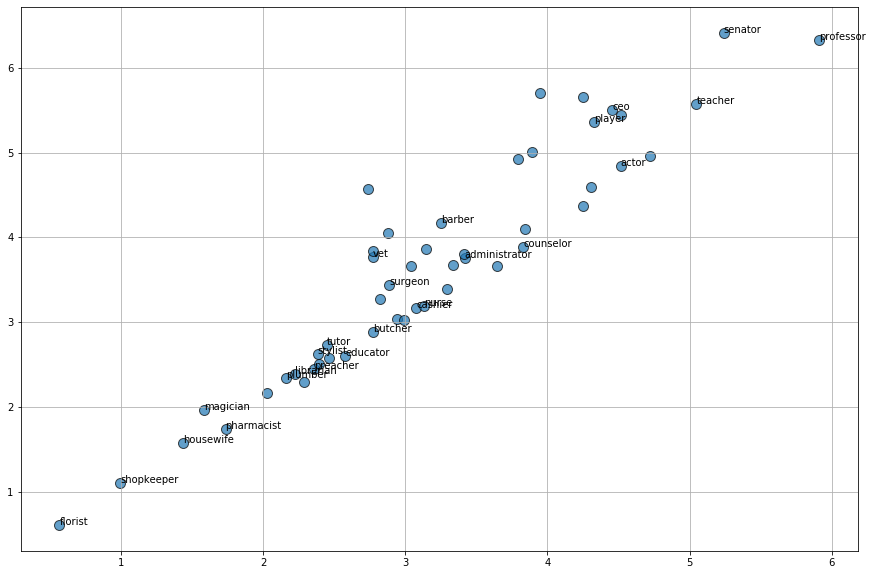

In [106]:
import matplotlib.pyplot as plt
from random import shuffle

fig, ax = plt.subplots(figsize=[15,10])

x_axis = []
y_axis = []

shuffled_list = professions
shuffle(shuffled_list)

for word in shuffled_list:
    words = model1[word]
    words = sorted(words, reverse=True)[0:2]
    x_axis.append(words[1])
    y_axis.append(words[0])
        
grph = ax.scatter(x_axis, y_axis, s=100, alpha=0.7, edgecolors='black')

i = 0
for txt in shuffled_list:
    if(i%2==0):
        ax.annotate(str(txt),(x_axis[i],y_axis[i]))
    i+=1
    
ax.grid(True)



plt.show()
    


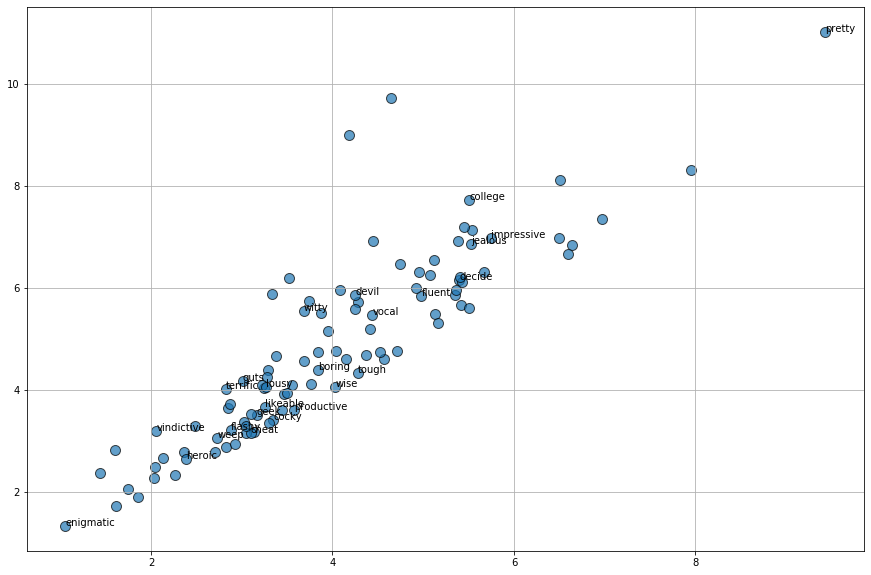

In [103]:
import matplotlib.pyplot as plt
from random import shuffle

fig, ax = plt.subplots(figsize=[15,10])

x_axis = []
y_axis = []

shuffled_list = misc_words
shuffle(shuffled_list)

for word in shuffled_list:
    words = model1[word]
    words = sorted(words, reverse=True)[0:2]
    x_axis.append(words[1])
    y_axis.append(words[0])
        
grph = ax.scatter(x_axis, y_axis, s = 100, alpha=0.7, edgecolors='black')
i = 0
for txt in shuffled_list:
    if(i%4==0):
        ax.annotate(str(txt),(x_axis[i],y_axis[i]))
    i+=1
    
ax.grid(True)



plt.show()
    


### Finding most biased words (Race)

In [120]:
vocabp = []
vocabm = []

professions = []
misc_words = []
with open('./professions.txt' ,'r') as fl:
    for word in fl:
        professions.append(word[:-1])    

with open('./misc_words.txt' ,'r') as fl:
    for word in fl:
        misc_words.append(word[:-1])

for word in professions:
    vocabp.append((word,model1[word]/npy.linalg.norm(model1[word])))
    
for word in misc_words:
    vocabm.append((word,model1[word]/npy.linalg.norm(model1[word])))
    
    
projectionp = []
projectionm = []


american = model1['american'] / npy.linalg.norm(model1['american'])
indian = model1['indian'] / npy.linalg.norm(model1['indian'])

race_subspc = (indian - american)

for word in vocabp:
    pro = npy.dot(model1[word[0]] / npy.linalg.norm(model1[word[0]]),race_subspc)
    projectionp.append((word[0],pro))
    
for word in vocabm:
    pro = npy.dot(model1[word[0]] / npy.linalg.norm(model1[word[0]]),race_subspc)
    projectionm.append((word[0],pro))
    
    
biasedp = sorted(projectionp, reverse = True, key = lambda x : x[1])
biasedm = sorted(projectionm, reverse = True, key = lambda x : x[1])




print("\nBias in Professions in Model - decending order (top 10) (indian-american)\n")
ten_bias = biasedp[0:10]
for bias in ten_bias:
    print(bias)
    
print("\nBias in Misc. words in Model - descending order (top 10) (indian-american)\n")
ten_bias = biasedm[0:10]
for bias in ten_bias:
    print(bias)



Bias in Professions in Model - decending order (top 10) (indian-american)

('butcher', 0.30157873)
('barber', 0.20129806)
('florist', 0.18413721)
('nurse', 0.15209064)
('vet', 0.14899719)
('cashier', 0.1279751)
('tutor', 0.12523493)
('waiter', 0.11155586)
('chemist', 0.108406395)
('shopkeeper', 0.105821185)

Bias in Misc. words in Model - descending order (top 10) (indian-american)

('lovely', 0.2813881)
('backpack', 0.25974354)
('bag', 0.20628145)
('cute', 0.19745344)
('purse', 0.19460957)
('sweet', 0.18077426)
('beautiful', 0.1678942)
('grumpy', 0.14973086)
('cool', 0.14963488)
('sassy', 0.14638355)


### Finding most biased words (Religion)

In [118]:
vocabp = []
vocabm = []

professions = []
misc_words = []
with open('./professions.txt' ,'r') as fl:
    for word in fl:
        professions.append(word[:-1])    

with open('./misc_words.txt' ,'r') as fl:
    for word in fl:
        misc_words.append(word[:-1])

for word in professions:
    vocabp.append((word,model1[word]/npy.linalg.norm(model1[word])))
    
for word in misc_words:
    vocabm.append((word,model1[word]/npy.linalg.norm(model1[word])))
    
    
projectionp = []
projectionm = []


christian = model1['christian'] / npy.linalg.norm(model1['christian'])
muslim = model1['muslim'] / npy.linalg.norm(model1['muslim'])

religion_subspc = (muslim - christian)

for word in vocabp:
    pro = npy.dot(model1[word[0]] / npy.linalg.norm(model1[word[0]]),religion_subspc)
    projectionp.append((word[0],pro))
    
for word in vocabm:
    pro = npy.dot(model1[word[0]] / npy.linalg.norm(model1[word[0]]),religion_subspc)
    projectionm.append((word[0],pro))
    
    
biasedp = sorted(projectionp, reverse = True, key = lambda x : x[1])
biasedm = sorted(projectionm, reverse = True, key = lambda x : x[1])




print("\nBias in Professions in Model - decending order (top 10) (muslim-christian)\n")
ten_bias = biasedp[0:10]
for bias in ten_bias:
    print(bias)
    
print("\nBias in Misc. words in Model - descending order (top 10) (muslim-christian)\n")
ten_bias = biasedm[0:10]
for bias in ten_bias:
    print(bias)



Bias in Professions in Model - decending order (top 10) (muslim-christian)

('vet', 0.12283135)
('cop', 0.11075719)
('soldier', 0.076730676)
('shopkeeper', 0.060545065)
('worker', 0.018872034)
('cashier', 0.016069816)
('butcher', -0.005377178)
('landlord', -0.00816943)
('nurse', -0.010036133)
('nanny', -0.011244484)

Bias in Misc. words in Model - descending order (top 10) (muslim-christian)

('terrorist', 0.2741907)
('car', 0.10418006)
('fear', 0.10198632)
('bag', 0.07560906)
('creep', 0.06417281)
('brute', 0.057166893)
('yell', 0.041089058)
('poor', 0.04030589)
('roar', 0.039248332)
('mad', 0.038921878)


## Debiasing the model

In [174]:
vocabp = []
vocabm = []

professions = []
misc_words = []
with open('./professions.txt' ,'r') as fl:
    for word in fl:
        professions.append(word[:-1])    

with open('./misc_words.txt' ,'r') as fl:
    for word in fl:
        misc_words.append(word[:-1])

for word in professions:
    vocabp.append((word,model1[word]/npy.linalg.norm(model1[word])))
    
for word in misc_words:
    vocabm.append((word,model1[word]/npy.linalg.norm(model1[word])))
    
    
projectionp = []
projectionm = []
hard_debiasp = []
hard_debiasm = []

debiased_professions = []
debiased_misc_words = []


man = model1['man'] / npy.linalg.norm(model1['man'])
woman = model1['woman'] / npy.linalg.norm(model1['woman'])
indian = model1['indian'] / npy.linalg.norm(model1['indian'])
indian = model1['american'] / npy.linalg.norm(model1['american'])
indian = model1['muslim'] / npy.linalg.norm(model1['muslim'])
indian = model1['christian'] / npy.linalg.norm(model1['christian'])


gender_subspc = (man - woman)
race_subspc = (indian - american)
religion_subspc = (muslim - christian)

bias_subspc = npy.dot(gender_subspc,race_subspc)
bias_subspc = npy.dot(bias_subspc,religion_subspc)


for word in vocabp:
    pro = ( npy.dot(model1[word[0]],gender_subspc) / npy.linalg.norm(model1[word[0]]) )
    projectionp.append((word[0],pro))
    pro = pro * gender_subspc
    pro = (model1[word[0]] - pro) / npy.linalg.norm(model1[word[0]] - pro)
    
    pro = ( npy.dot(model1[word[0]],race_subspc) / npy.linalg.norm(model1[word[0]]) )
    pro = pro * race_subspc
    pro = (model1[word[0]] - pro) / npy.linalg.norm(model1[word[0]] - pro)
    
    pro = ( npy.dot(model1[word[0]],religion_subspc) / npy.linalg.norm(model1[word[0]]) )
    pro = pro * religion_subspc
    pro = (model1[word[0]] - pro) / npy.linalg.norm(model1[word[0]] - pro)
    
    debiased_professions.append((word[0],pro))
    pro = npy.dot(pro, gender_subspc)
    hard_debiasp.append((word[0],pro)) 
    
for word in vocabm:
    pro = ( npy.dot(model1[word[0]],gender_subspc) / npy.linalg.norm(model1[word[0]]) ) 
    projectionm.append((word[0],pro))
    pro = pro * gender_subspc
    pro = (model1[word[0]] - pro) / npy.linalg.norm(model1[word[0]] - pro)
    debiased_misc_words.append((word[0],pro))
    pro = npy.dot(pro, gender_subspc)
    hard_debiasm.append((word[0],pro))
    


biasedp = sorted(projectionp, reverse = True, key = lambda x : x[1])
biasedm = sorted(projectionm, reverse = True, key = lambda x : x[1])

debiasedp = sorted(hard_debiasp, reverse = True, key = lambda x : x[1])
debiasedm = sorted(hard_debiasm, reverse = True, key = lambda x : x[1])





print("\nBias in Professions in Model - decending order (top 10)\n")
ten_bias = biasedp[0:10]
ten_debias = debiasedp[0:10]
for bias, debias in zip(ten_bias, ten_debias):
    print(bias,"==>",debias)
    
print("\nBias in Misc. words in Model - descending order (top 10)\n")
ten_bias = biasedm[0:10]
ten_debias = debiasedm[0:10]
for bias, debias in zip(ten_bias, ten_debias):
    print(bias,"==>",debias)



Bias in Professions in Model - decending order (top 10)

('magician', 0.11574504) ==> ('magician', 0.11456225)
('carpenter', 0.046477906) ==> ('carpenter', 0.045484226)
('butcher', 0.035740644) ==> ('butcher', 0.035707153)
('gamer', 0.027397364) ==> ('gamer', 0.026887717)
('soldier', 0.018920997) ==> ('soldier', 0.019234942)
('servant', 0.009307076) ==> ('servant', 0.008474963)
('barber', 0.0073357197) ==> ('barber', 0.006497547)
('engineer', -0.0022402948) ==> ('engineer', -0.0024358318)
('player', -0.014475175) ==> ('player', -0.014581879)
('programmer', -0.01649278) ==> ('programmer', -0.017327033)

Bias in Misc. words in Model - descending order (top 10)

('swear', 0.21706519) ==> ('swear', 0.21250035)
('filthy', 0.20151068) ==> ('filthy', 0.19604209)
('sweet', 0.19195326) ==> ('sweet', 0.18784045)
('roar', 0.18197575) ==> ('roar', 0.17574164)
('weep', 0.18006237) ==> ('weep', 0.17289506)
('pretty', 0.17052722) ==> ('pretty', 0.16845691)
('beautiful', 0.15033276) ==> ('beautiful',

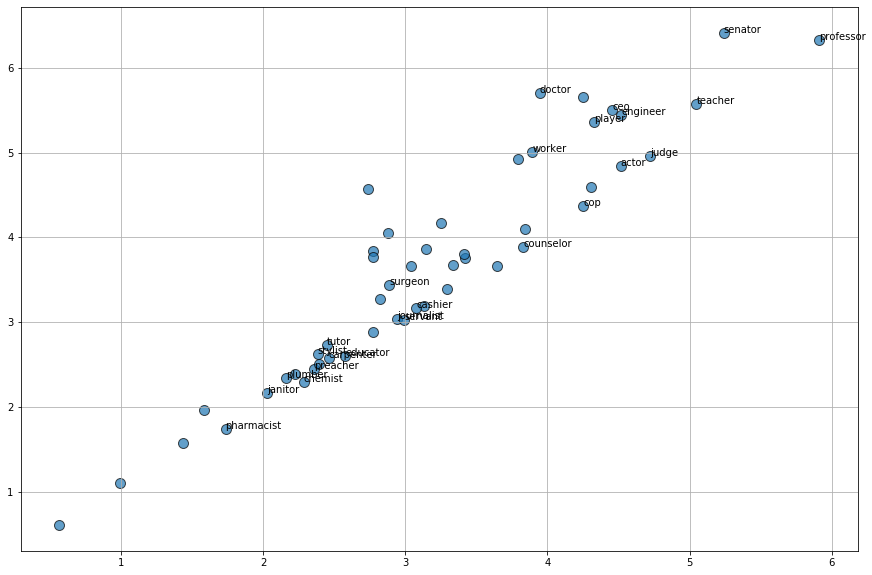

In [167]:
import matplotlib.pyplot as plt
from random import shuffle

fig, ax = plt.subplots(figsize=[15,10])

x_axis = []
y_axis = []

shuffled_list = debiased_professions
shuffle(shuffled_list)

for word in shuffled_list:
    words = model1[word[0]]
    words = sorted(words, reverse=True)[0:2]
    x_axis.append(words[1])
    y_axis.append(words[0])
        
grph = ax.scatter(x_axis, y_axis, s=100, alpha=0.7, edgecolors='black')

i = 0
for txt in shuffled_list:
    if(i%2==0):
        ax.annotate(str(txt[0]),(x_axis[i],y_axis[i]))
    i+=1
    
ax.grid(True)



plt.show()
    


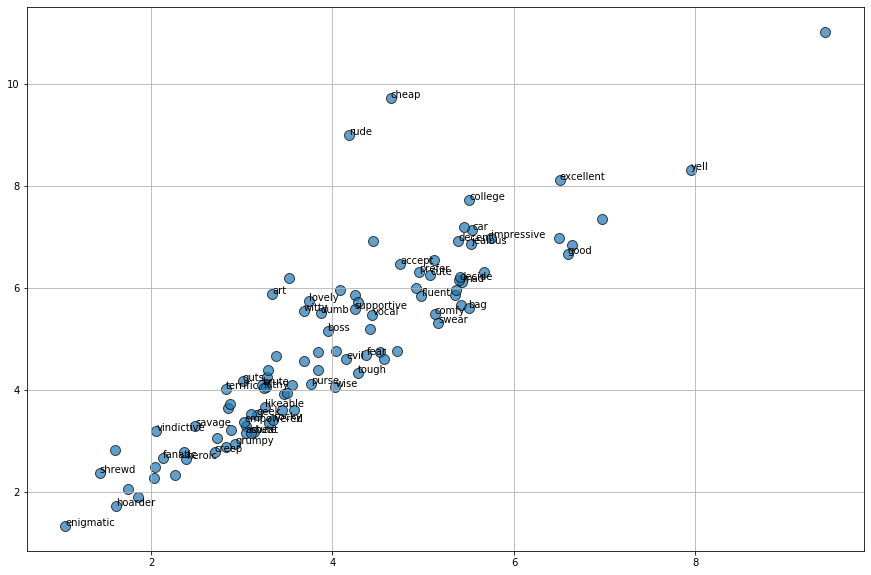

In [171]:
import matplotlib.pyplot as plt
from random import shuffle

fig, ax = plt.subplots(figsize=[15,10])

x_axis = []
y_axis = []

shuffled_list = debiased_misc_words
shuffle(shuffled_list)

for word in shuffled_list:
    words = model1[word[0]]
    words = sorted(words, reverse=True)[0:2]
    x_axis.append(words[1])
    y_axis.append(words[0])
        
grph = ax.scatter(x_axis, y_axis, s=100, alpha=0.7, edgecolors='black')

i = 0
for txt in shuffled_list:
    if(i%2==0):
        ax.annotate(str(txt[0]),(x_axis[i],y_axis[i]))
    i+=1
    
ax.grid(True)



plt.show()
    
